# **Chapter 4. Python 을 활용한 데이터 시각화** 






---
### **학습 목표**
> 4-1. matplotlib 이란? <br>
> 4-2. matplotlib 구성 요소와 기본 그래프 <br>
> 4-3. matplotlib 그래프 유형 별 시각화 <br>
> 4-4. seaborn 이란? <br>
> **4-5. matplotlib 과 seaborn** <br>
> 4-6. seaborn 그래프 유형 별 시각화 <br>
> 4-7. folium 이란? <br>
> 4-8. folium 기본 사용법 <br>
> 4-9. folium 지도 데이터 시각화 실습

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [ ]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

## 4-5. matplotlib 과 seaborn

In [1]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

#한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


%matplotlib inline

> ###  **4-5-1. Seaborn 의 장점**
> ##### 1. **통계 서포트** 기능
> ##### 2. **다양하고 아름다운 컬러 팔레팅**
> ##### 3. Pandas **데이터 프레임과 높은 호환성**
> ##### 4. **Matplotlib 그래프와 높은 호환성**
>    - `seaborn` 은 `matplotlib` 결과물을 **더욱 쉽고 아름답게** 하고자  만들어졌습니다.
>    - 그러므로 당연히 **seaborn 의 결과물 <-> matplotlib 결과물** 입니다.


> **1. 통계 서포트 기능**

In [3]:
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

In [5]:
# 데이터 로드
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

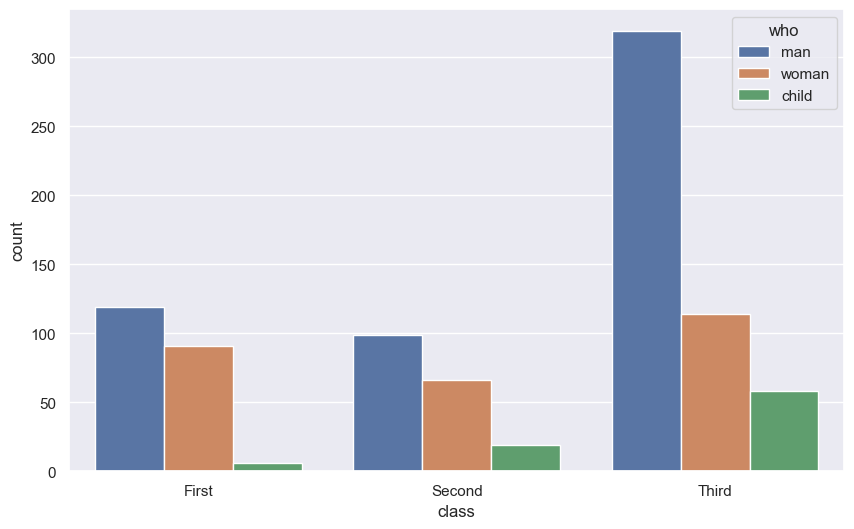

In [7]:
# 항목의 개수를 세어주는 'countplot'
plt.figure(figsize=(10,6))
sns.countplot(x="class", hue="who", data=titanic)
plt.show()

<Figure size 1000x600 with 0 Axes>

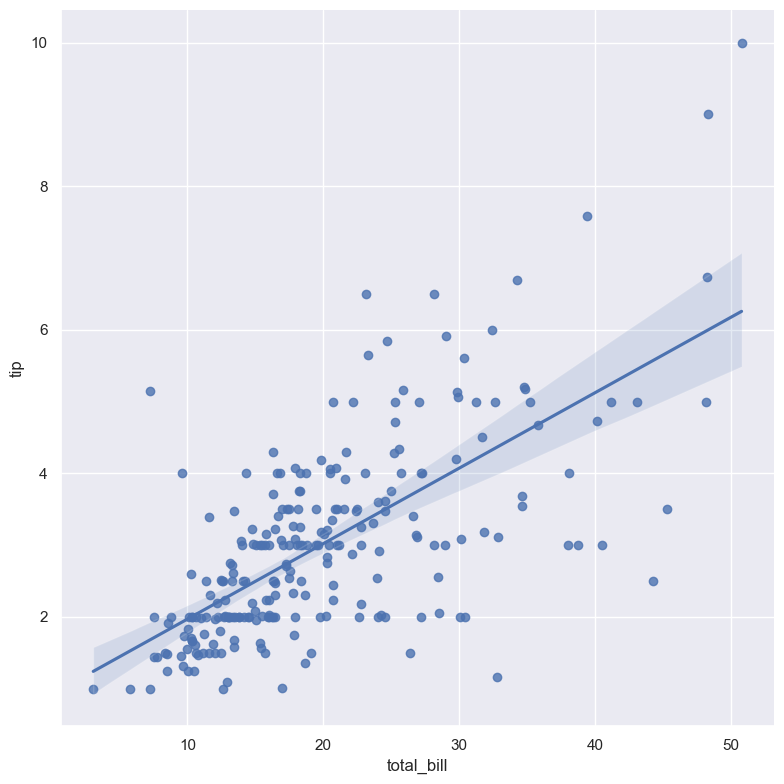

In [13]:
# 선형 회귀 관계를 보여주는 'lmplot'
plt.figure(figsize=(10,6))
sns.lmplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()

<Figure size 1000x600 with 0 Axes>

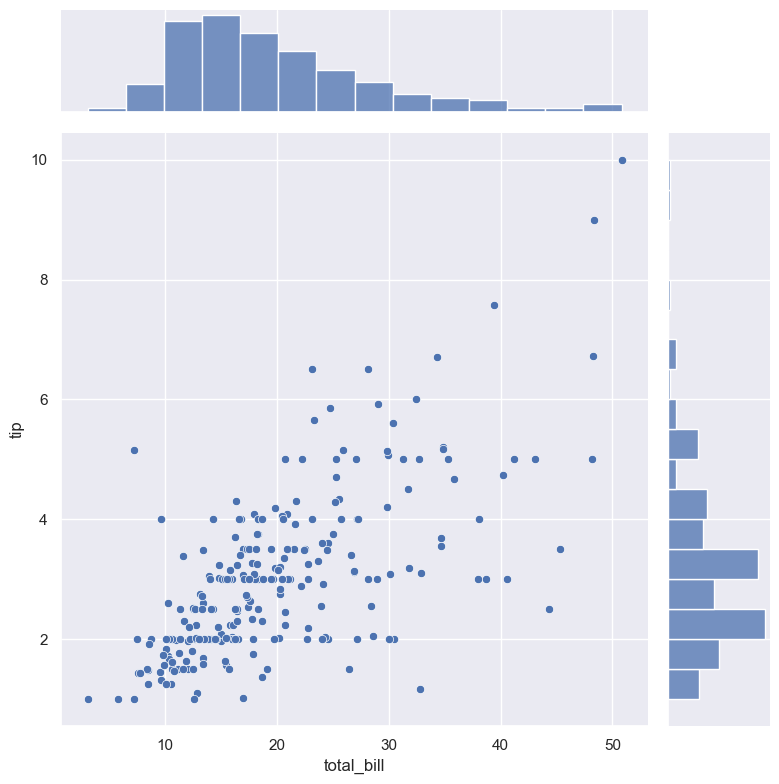

In [15]:
# 산점도와 히스토그램을 동시에 보여주는 'jointplot'
plt.figure(figsize=(10,6))
sns.jointplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()

In [19]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
# 문자열 열 제외
numeric_titanic = titanic.select_dtypes(include=['number'])
numeric_titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


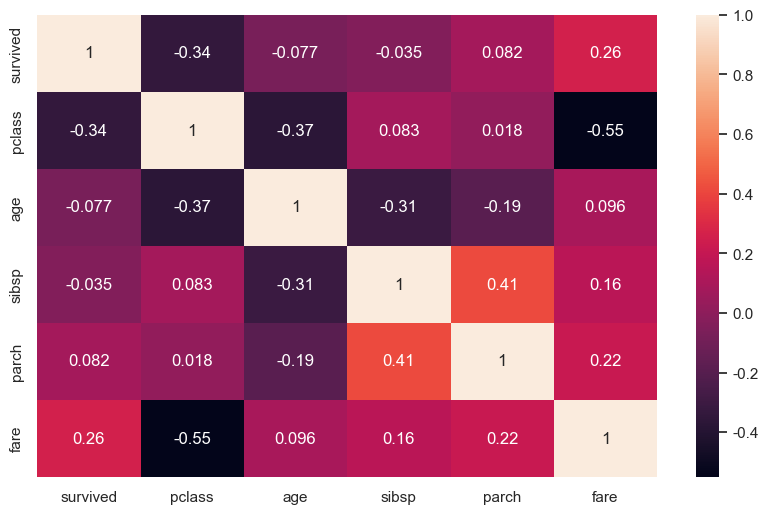

In [27]:
# 히트맵 'heatmap'
plt.figure(figsize=(10,6))
sns.heatmap(numeric_titanic.corr(), annot=True)
plt.show()

> **2. 다양하고 아름다운 컬러 팔레팅**
> - seaborn 은 **`palette`** 옵션을 사용해 **컬러를 자동으로 Beautify** 해줍니다.
> - [seaborn 의 컬러 팔레트](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [29]:
# 기본 팔레트
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [31]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
sns.color_palette('rainbow')

[(0.21764705882352942, 0.42912060877260894, 0.9755119679804366),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.3549019607843137, 0.9741386021045101, 0.7829276104921028),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.9274509803921569, 0.7829276104921029, 0.43467642176596505),
 (1.0, 0.4291206087726091, 0.2199463578396687)]

In [ ]:
sns.color_palette('Reds')

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

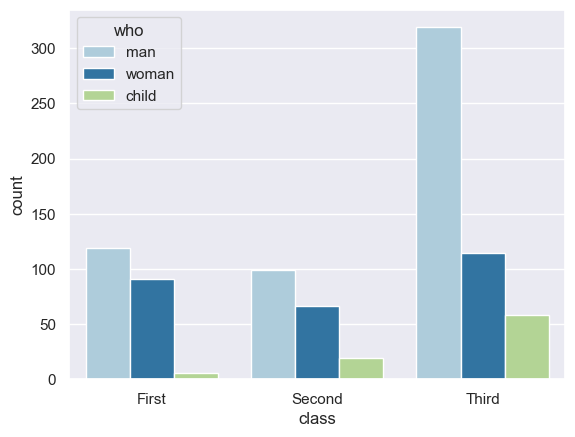

In [33]:
sns.countplot(x="class", hue="who", palette='Paired', data=titanic)
plt.show()

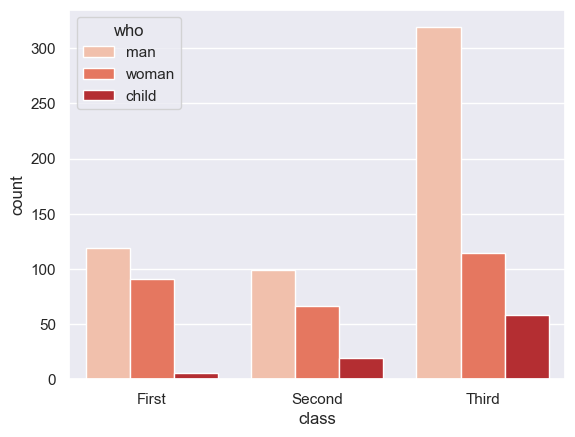

In [35]:
sns.countplot(x="class", hue="who", palette='Reds', data=titanic)
plt.show()

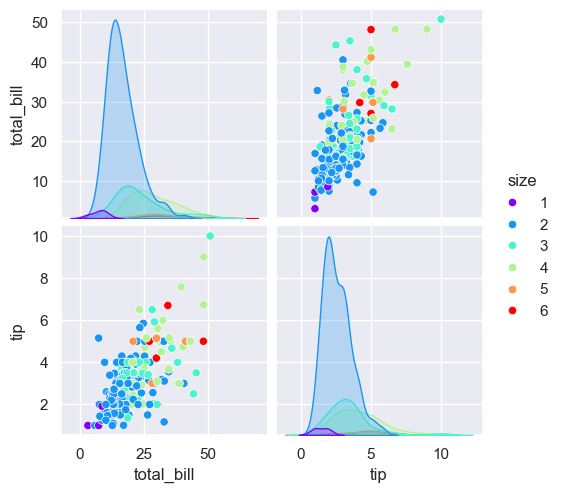

In [37]:
sns.pairplot(tips, hue='size', palette="rainbow")
plt.show()

> **3. Pandas 데이터 프레임과 높은 호환성**
> - `data` 인자에 데이터 프레임을 대입, 나머지 인자에 컬럼명 사용 가능

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


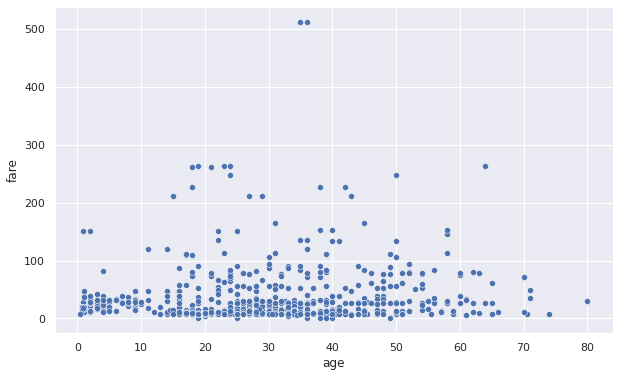

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=titanic, x='age', y='fare')
plt.show()

> ###  **4-5-2. matplotlib 그래프를 seaborn 에서 표현하기**
> - `matplotlib` 으로 그리는 그래프는 `seaborn` 에서 **똑같이 연출이 가능**합니다.
> - 또한 `matplotlib` 과 `seaborn` 을 **섞어서 사용하는 것도 가능**합니다!

In [39]:
# 데이터 로드
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


> **matplotlib 으로 그리기**

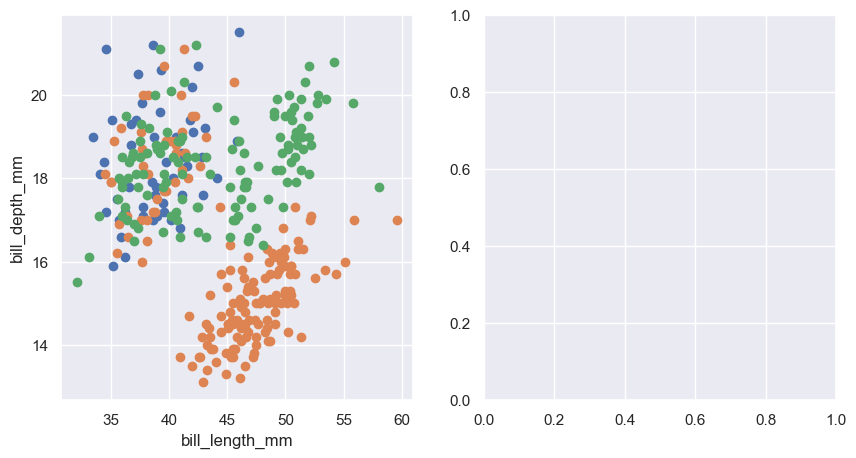

In [41]:
# 비교를 위해 두개 axes 를 만듭니다.
# 왼쪽에는 matplotlib 그래프, 오른쪽에는 seaborn 그래프를 그리겠습니다.
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

# ---
# axes[0] : matplotlib
islands = penguins['island'].unique()
color = 0
for island in islands:
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["island"]==island],
                   penguins["bill_depth_mm"].loc[penguins["island"]==island],
                   c=f"C{color}", label=island)
    color = color + 1

axes[0].set_xlabel("bill_length_mm")
axes[0].set_ylabel("bill_depth_mm")

plt.show()

> **seaborn 으로 그리기**
> - seaborn 으로 같은 그래프를 그리는 것이 **코드가 더욱 간결한 것**을 확인할 수 있습니다.

TypeError: scatterplot() got multiple values for argument 'data'

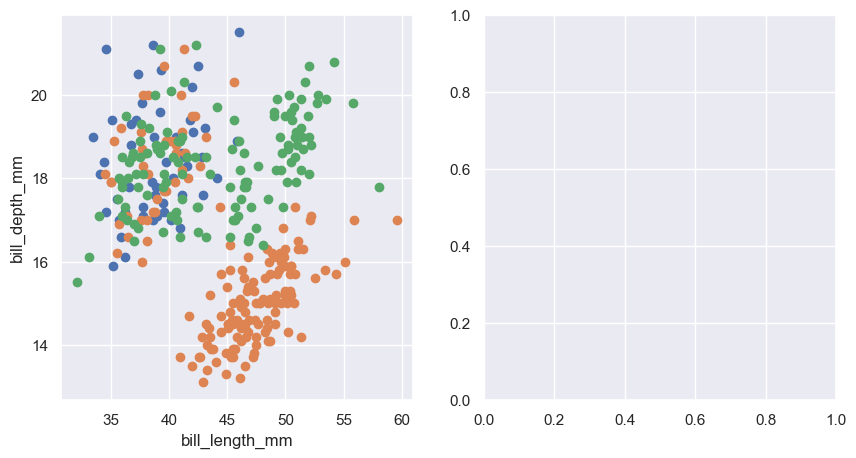

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

# ---
# axes[0] : matplotlib
islands = penguins['island'].unique()
color = 0
for island in islands:
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["island"]==island],
                   penguins["bill_depth_mm"].loc[penguins["island"]==island],
                   c=f"C{color}", label=island)
    color = color + 1

axes[0].set_xlabel("bill_length_mm")
axes[0].set_ylabel("bill_depth_mm")

# ---
# axes[1] : seaborn
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="island", data=penguins, ax=axes[1])

plt.show()

> **matplotlib + seaborn 혼합해서 그리기**
> - matplotlib 과 seaborn 은 **자유롭게 섞여서 사용**될 수 있습니다.
> - **왼쪽 그래프** : matplotlib 산점도 + seaborn 추세선
> - **오른쪽 그래프** : seaborn 산점도 + matplotlib 중심점

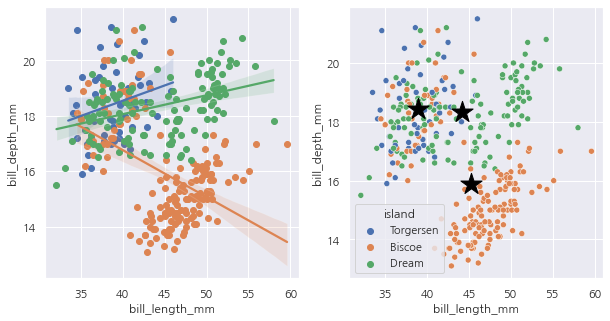

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

# ---
# axes[0] : matplotlib 산점도
islands = penguins['island'].unique()
color = 0
for island in islands:
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["island"]==island],
                   penguins["bill_depth_mm"].loc[penguins["island"]==island],
                   c=f"C{color}", label=island)
    color = color + 1

    # seaborn 추세선
    sns.regplot("bill_length_mm", "bill_depth_mm", data=penguins.loc[penguins["island"]==island], 
                scatter=False, ax=axes[0])

axes[0].set_xlabel("bill_length_mm")
axes[0].set_ylabel("bill_depth_mm")

# ---
# axes[1] : seaborn 산점도
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="island", data=penguins, ax=axes[1])

# matplotlib 중심점
for island in islands:
    # matplotlib 중심점
    axes[1].scatter(penguins["bill_length_mm"].loc[penguins["island"]==island].mean(),
                   penguins["bill_depth_mm"].loc[penguins["island"]==island].mean(),
                   c="black", marker="*", s=500)

plt.show()